In [4]:
import numpy as np

import matplotlib.pyplot as plt

from tabulate import tabulate

In [5]:
# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 16  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 24  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 32  # Font size of title

# Synthetic data

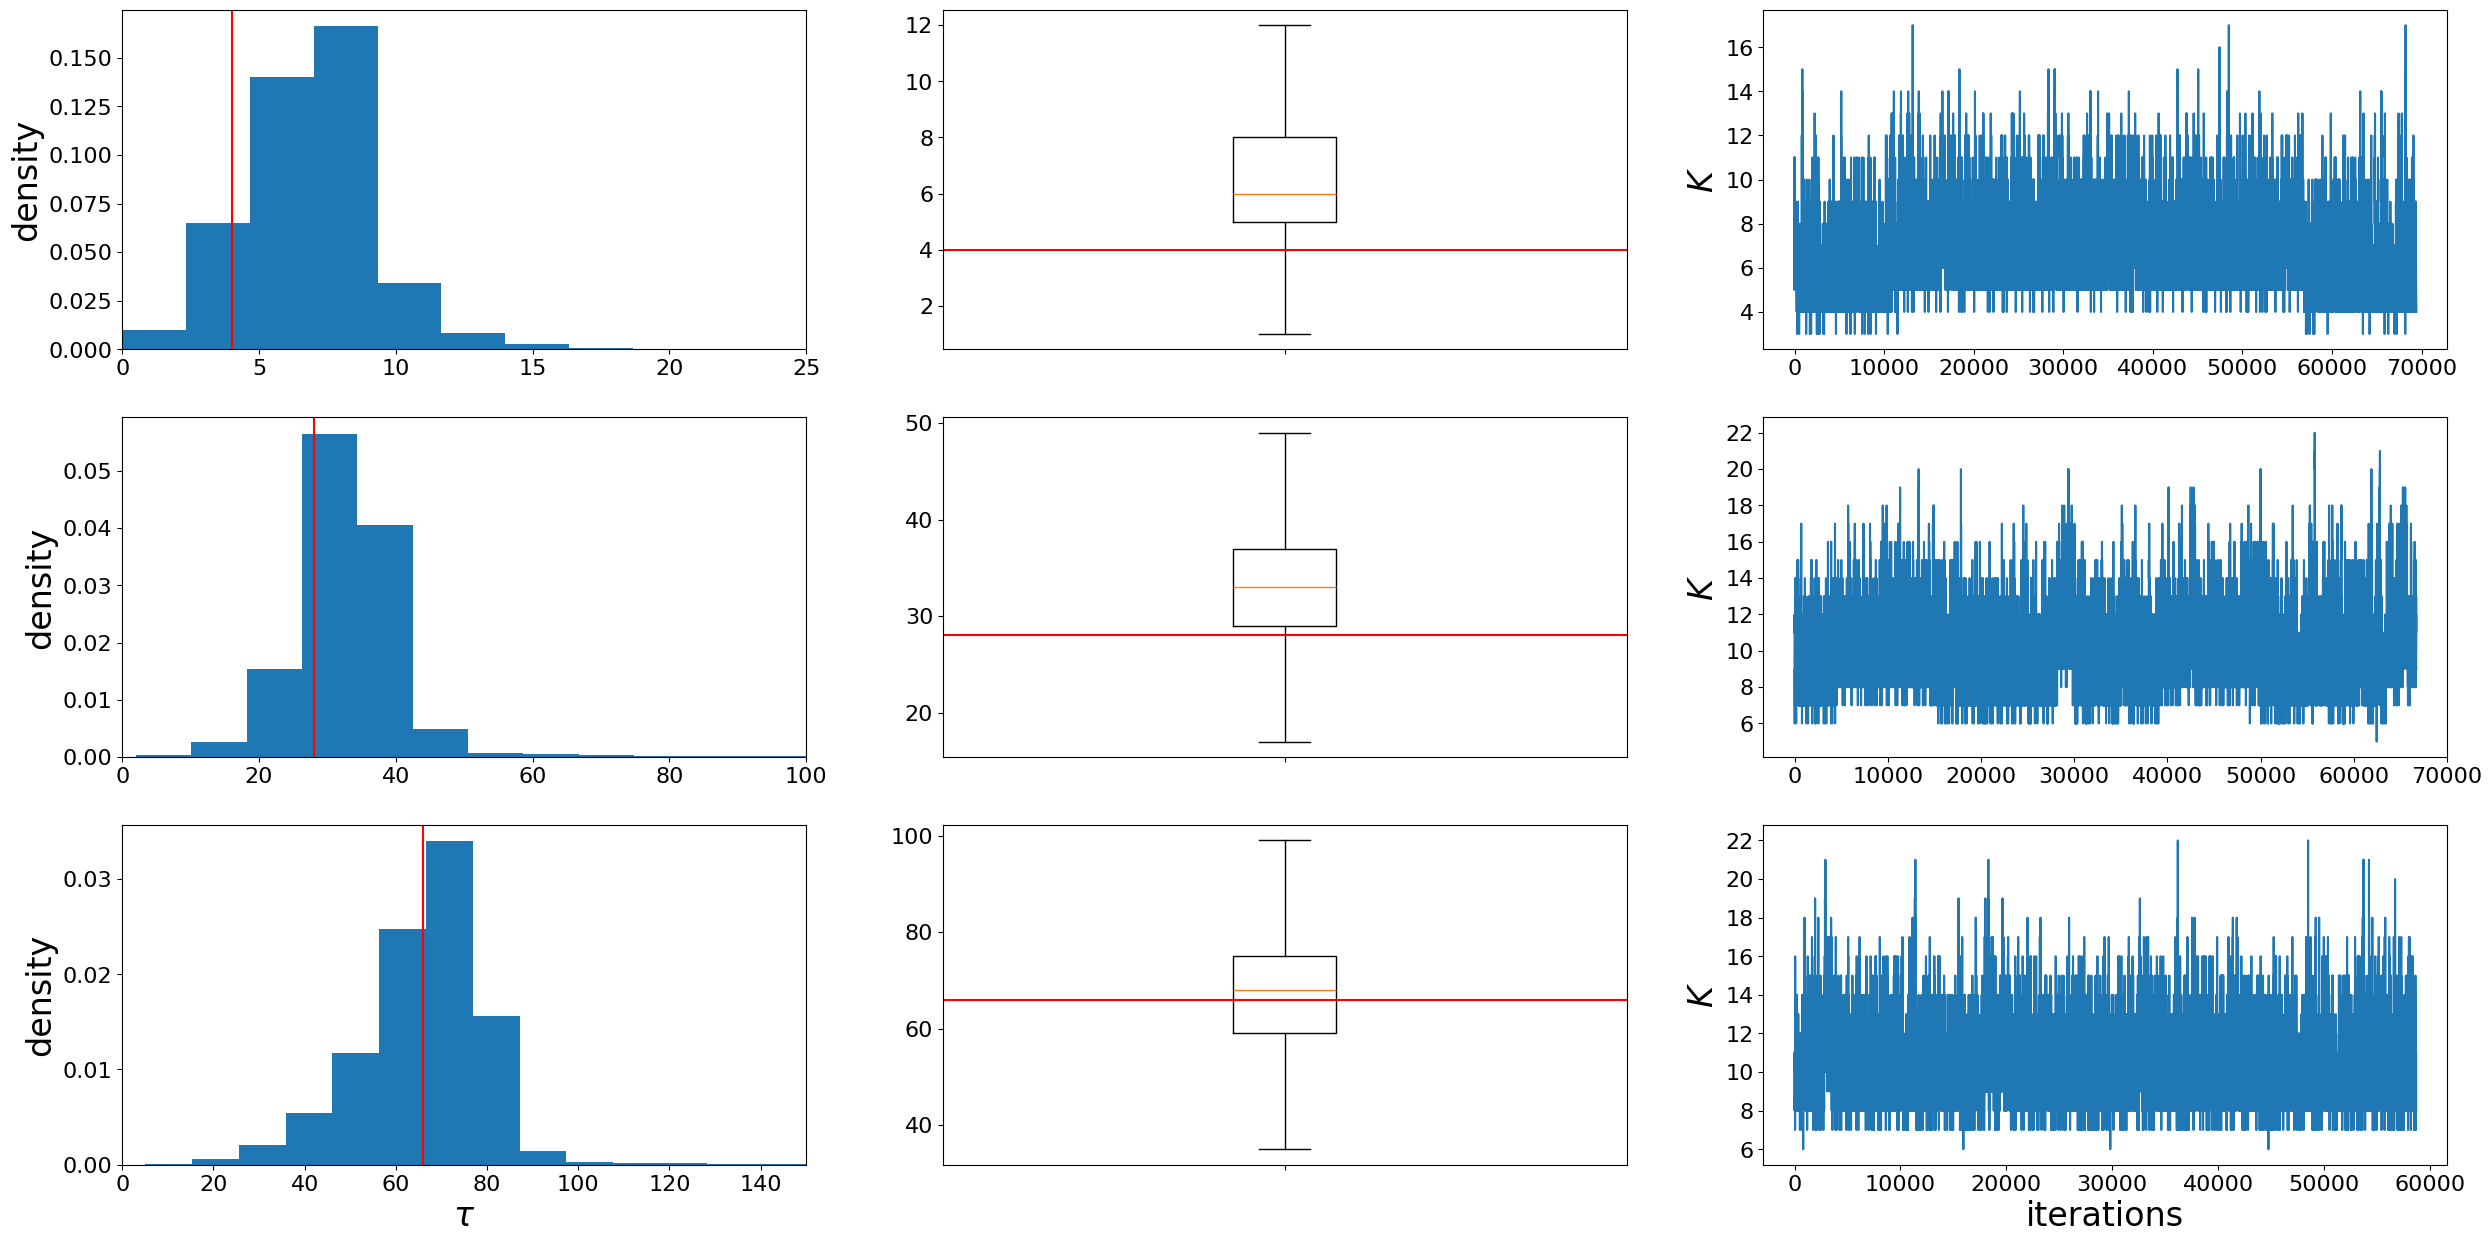

In [6]:
table_list = []

headers = ["Algorithm type", "$n$", r"True $\tau$", r"Est. $\tau$", "Comp. time (max = 12h)"]
table_list.append(headers)

fig, ax = plt.subplots(3, 3, figsize = (30, 15))

path = "data/synthetic/BNP/sampling/"
tau_insample = [4, 28, 66]

n_list = [1000, 5000, 10000]
times = [43222, 43230, 43212]

for i in range(3):

	tau_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_tau.npy")
	K_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_K.npy")

	table_list.append(["BNP sampling", "n="+str(n_list[i]), r"$\tau$="+str(tau_insample[i]), 
		    		str(np.round(np.mean(tau_chain),2))+"+/-"+str(np.round(np.std(tau_chain),2)), str(np.round(times[i]/3600, 2))])

	if i ==0:
		nbins = 15
	else:
		nbins = 100
		
	ax[i,0].hist(tau_chain, nbins, density = True)
	ax[i,0].axvline(x=tau_insample[i], color = "red")
	ax[i,0].set_ylabel(r"density")

	if i ==0:
		vxlim = 25
	elif i==1:
		vxlim = 100
	else:
		vxlim = 150

	ax[i,0].set_xlim((0,vxlim))

	ax[i,1].boxplot(tau_chain, showfliers=False)
	ax[i,1].axhline(y=tau_insample[i], color = "red")
	ax[i,1].set_xticklabels([r""])

	ax[i,2].plot(K_chain)
	ax[i,2].set_ylabel(r"$K$")

	if i ==2:

		ax[i,0].set_xlabel(r"$\tau$")
		ax[i,2].set_xlabel("iterations")

	ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [7]:
table_to_print = tabulate(table_list, tablefmt="fancy_grid")
print(table_to_print)

╒════════════════╤═════════╤═════════════╤═══════════════╤════════════════════════╕
│ Algorithm type │ $n$     │ True $\tau$ │ Est. $\tau$   │ Comp. time (max = 12h) │
├────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling   │ n=1000  │ $\tau$=4    │ 6.66+/-2.42   │ 12.01                  │
├────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling   │ n=5000  │ $\tau$=28   │ 34.92+/-23.63 │ 12.01                  │
├────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling   │ n=10000 │ $\tau$=66   │ 67.33+/-25.42 │ 12.0                   │
╘════════════════╧═════════╧═════════════╧═══════════════╧════════════════════════╛


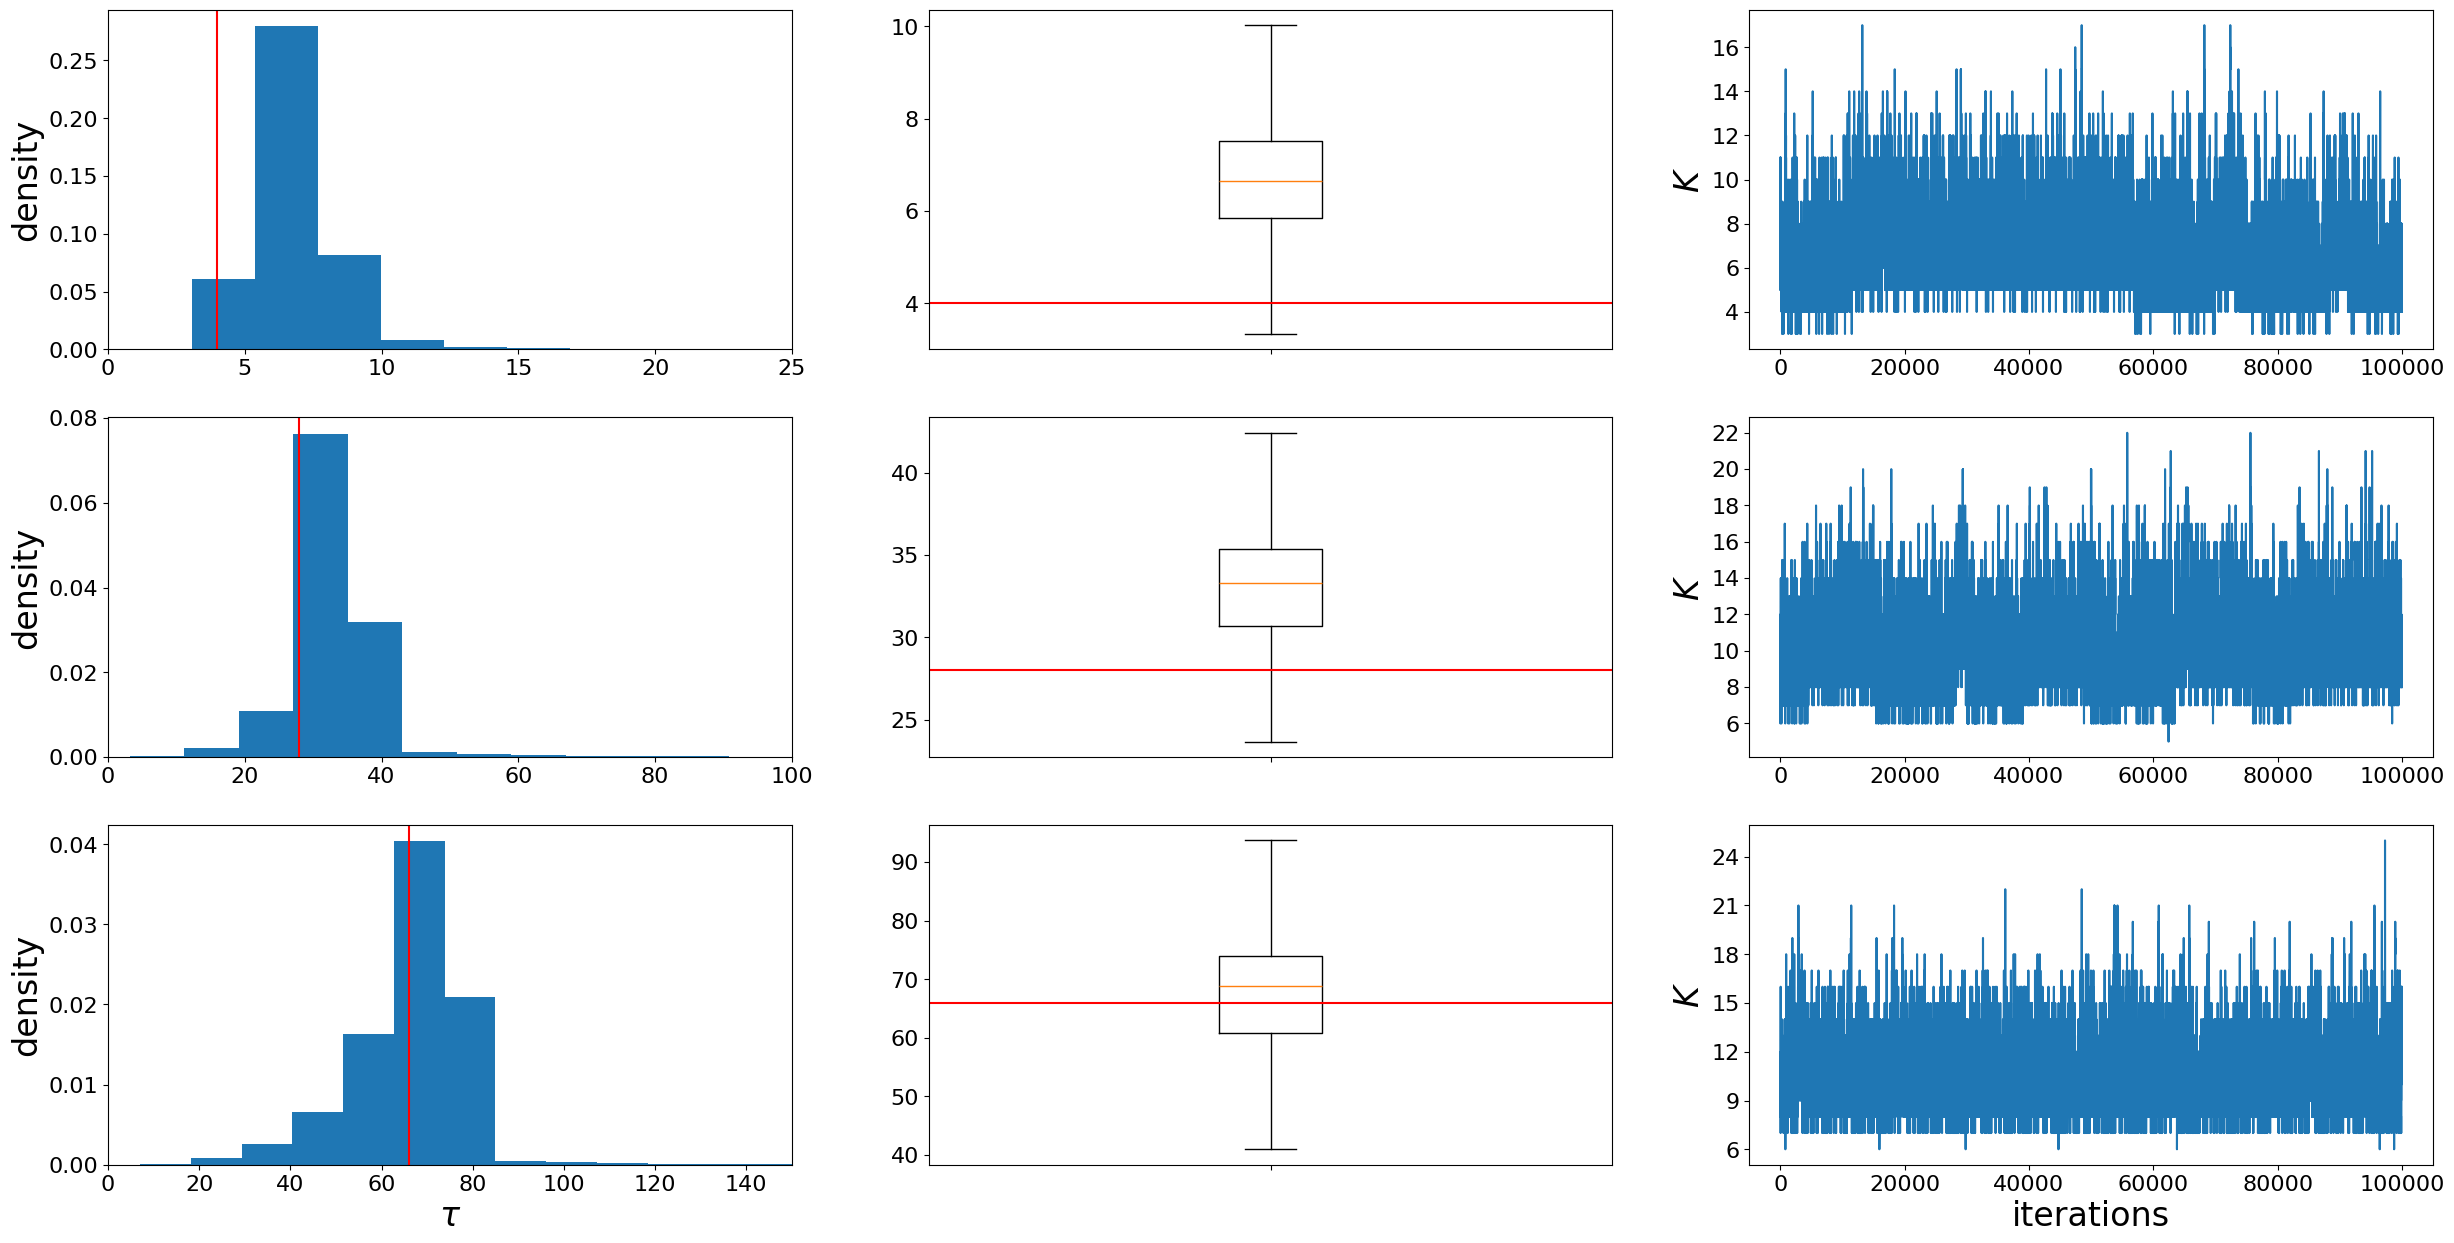

In [8]:
fig, ax = plt.subplots(3, 3, figsize = (30, 15))

path = "data/synthetic/BNP/mc/"
tau_insample = [4, 28, 66]

n_list = [1000, 5000, 10000]
times = [5351, 11279, 19262]

for i in range(3):

	tau_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_tau.npy")
	K_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_K.npy")

	table_list.append(["BNP Monte Carlo", "n="+str(n_list[i]), r"$\tau$="+str(tau_insample[i]), 
				str(np.round(np.mean(tau_chain),2))+"+/-"+str(np.round(np.std(tau_chain),2)), str(np.round(times[i]/3600, 2))])

	if i ==0:
		nbins = 15
	else:
		nbins = 100
		
	ax[i,0].hist(tau_chain, nbins, density = True)
	ax[i,0].axvline(x=tau_insample[i], color = "red")
	ax[i,0].set_ylabel(r"density")

	if i ==0:
		vxlim = 25
	elif i==1:
		vxlim = 100
	else:
		vxlim = 150

	ax[i,0].set_xlim((0,vxlim))

	ax[i,1].boxplot(tau_chain, showfliers=False)
	ax[i,1].axhline(y=tau_insample[i], color = "red")
	ax[i,1].set_xticklabels([r""])

	ax[i,2].plot(K_chain)
	ax[i,2].set_ylabel(r"$K$")

	if i ==2:

		ax[i,0].set_xlabel(r"$\tau$")
		ax[i,2].set_xlabel("iterations")

	ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [9]:
table_to_print = tabulate(table_list, tablefmt="fancy_grid")
print(table_to_print)

╒═════════════════╤═════════╤═════════════╤═══════════════╤════════════════════════╕
│ Algorithm type  │ $n$     │ True $\tau$ │ Est. $\tau$   │ Comp. time (max = 12h) │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=1000  │ $\tau$=4    │ 6.66+/-2.42   │ 12.01                  │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=5000  │ $\tau$=28   │ 34.92+/-23.63 │ 12.01                  │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=10000 │ $\tau$=66   │ 67.33+/-25.42 │ 12.0                   │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP Monte Carlo │ n=1000  │ $\tau$=4    │ 6.79+/-1.55   │ 1.49                   │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP Monte Carlo │ n=5000  │ $\tau$=28   │ 34.48+/-20.86 │ 3.13 

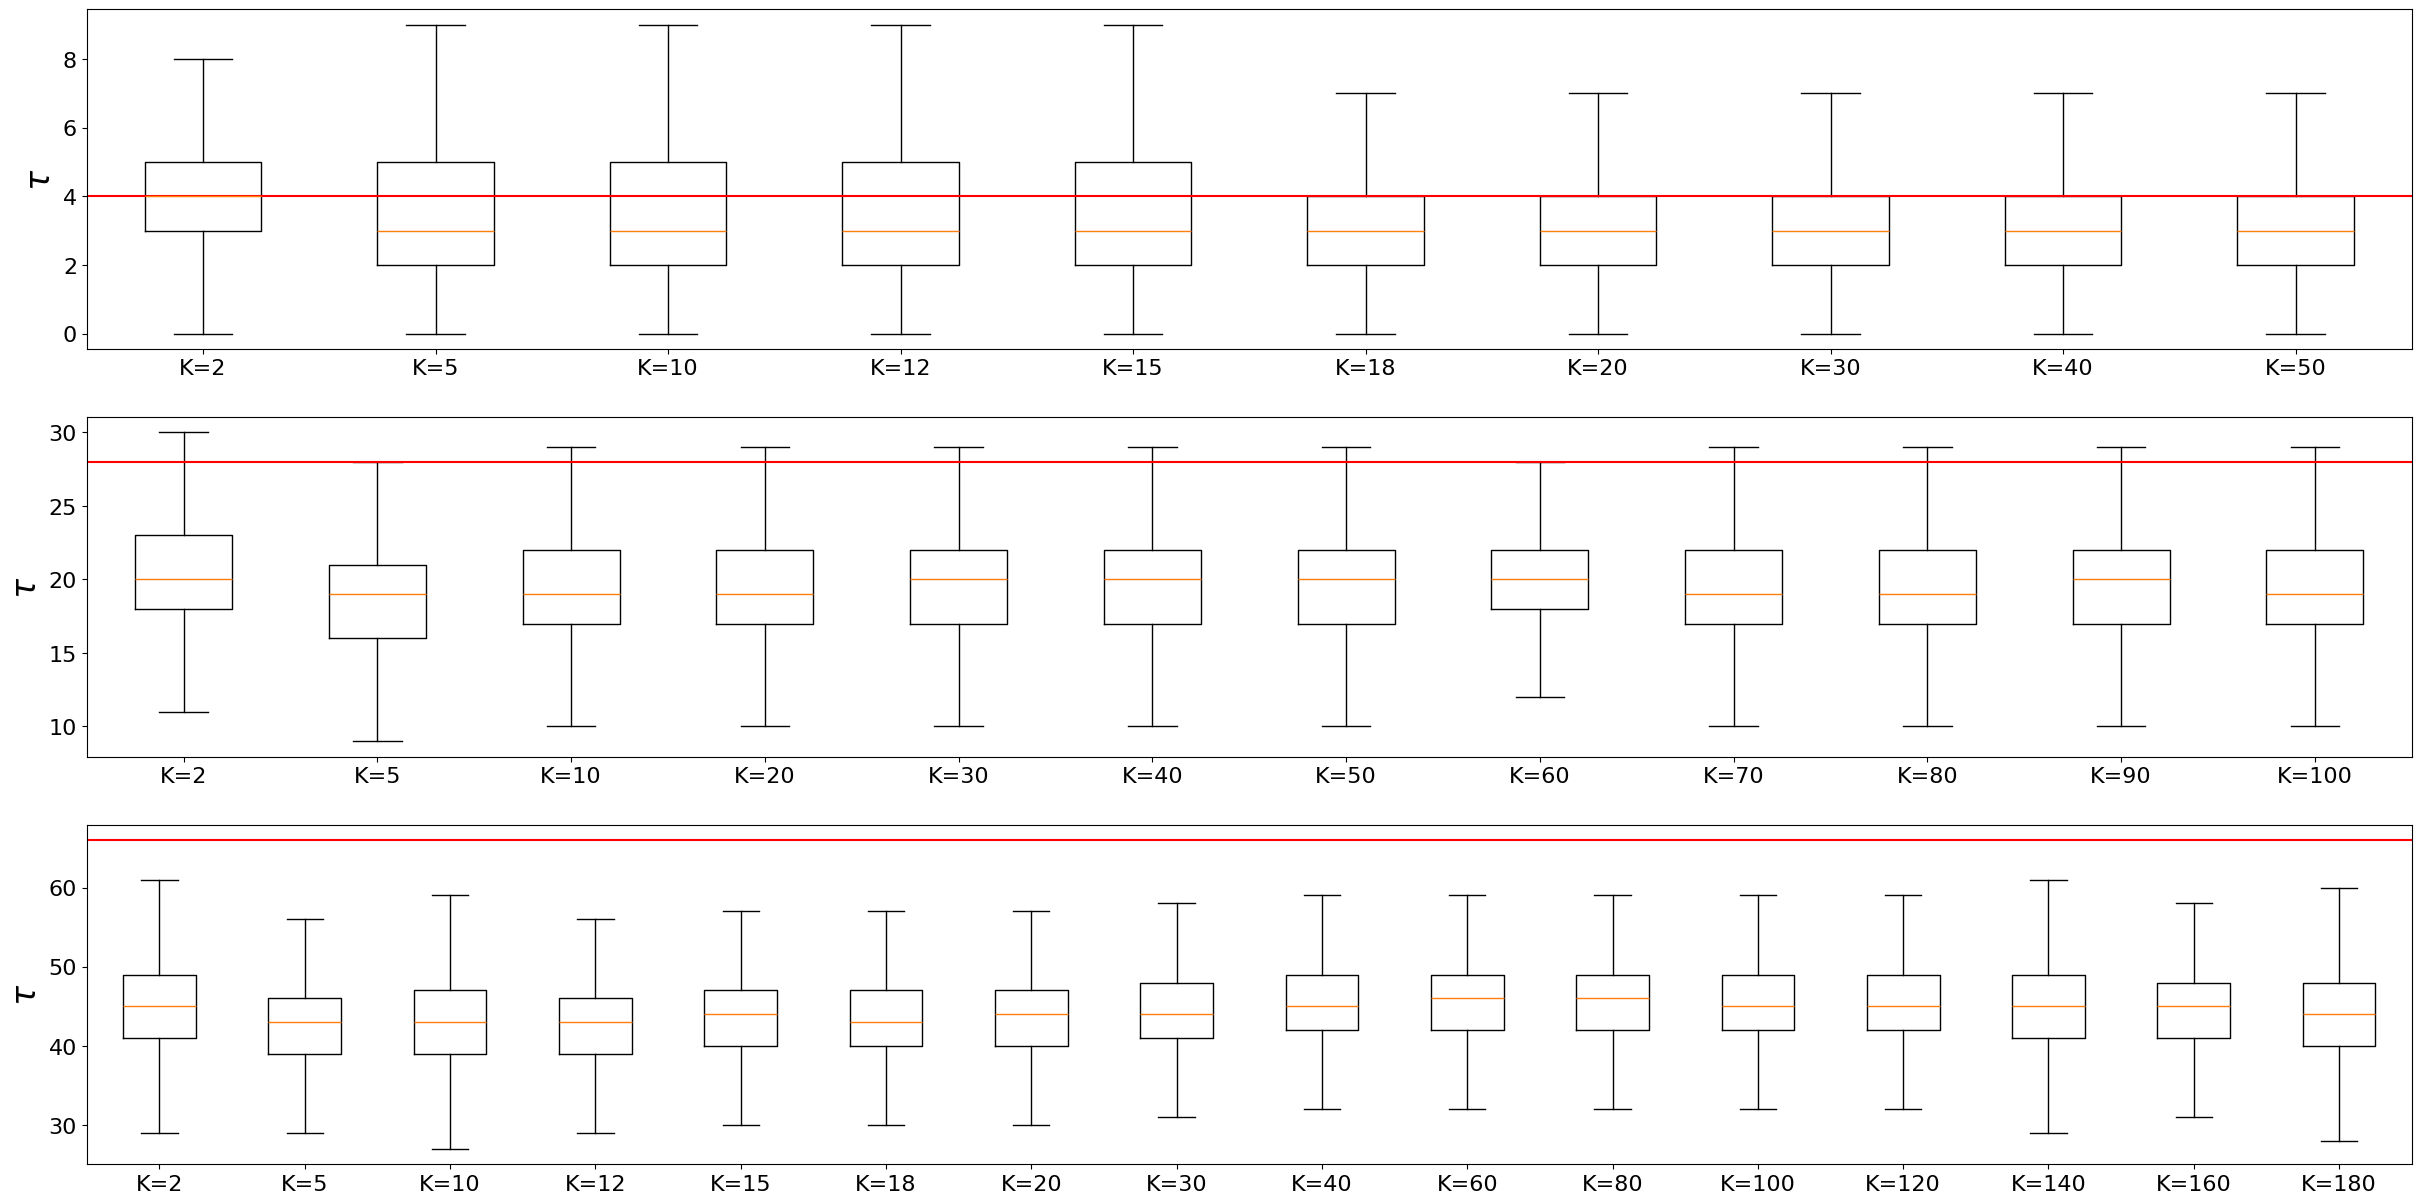

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (30, 15))

path = "data/synthetic/MV/"

K_list_1 = [2, 5, 10, 12, 15, 18, 20, 30, 40, 50]
K_list_2 = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
K_list_3 = [2, 5, 10, 12, 15, 18, 20, 30, 40, 60, 80, 100, 120, 140, 160, 180]

K_list = [K_list_1, K_list_2, K_list_3]
tau_insample = [4, 28, 66]
n_list = [1000, 5000, 10000]
times = [[17782.4, 18040.9, 19858.5, 20225, 19967.4, 18451.9, 20432.9, 18921.9, 19327.6, 21124.9],
         [19269.6, 19425.1, 19466, 20241.6, 22025.2, 20802.2, 21921.7, 22673.4, 24054.2, 24381.9],
         [21424.1, 20064.9, 21426.7, 24337.9, 23839.4, 24230.7, 25784.2, 29418.4, 28306.1, 29216.8]]

for n in range(3):

	data_to_plot = []
	name_to_plot = []

	if n==0:
		label_dim = 10
	elif n==1:
		label_dim = 12
	else:
		label_dim = 16

	optimal_K = []
	mean_list = []
	sd_list   = []
	for i in range(label_dim):

		if n==0:
			label_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
		elif n==1:
			label_list = ["01", "02", "03", "11", "22", "33", "44", "55", "66", "77", "88", "99"]
		else:
			label_list = ["01", "02", "03", "04", "05", "06", "07", "11", "22", "33", "44", "55", "66", "77", "88", "99"]
		

		chain = np.load(path+str(n_list[n])+"/synthdata_tau_"+str(n_list[n])+"_"+str(label_list[i])+"_MCMC_tau.npy")
		
		optimal_K.append(np.abs(np.mean(chain) - tau_insample[n]))
		mean_list.append(np.mean(chain))
		sd_list.append(np.std(chain))

		data_to_plot.append(chain)
		name_to_plot.append("K="+str(K_list[n][i]))

	# Create boxplot
	ax[n].boxplot(data_to_plot, showfliers=False)

	# Customize labels and title
	ax[n].set_xticklabels(name_to_plot)
	ax[n].axhline(y=tau_insample[n], color = "red")

	ax[n].set_ylabel(r"$\tau$")

	table_list.append(["MVR K="+str(K_list[n][np.argmin(np.array(optimal_K))]), 
			   "n="+str(n_list[n]), r"$\tau$="+str(tau_insample[n]), 
		    	   str(np.round(mean_list[np.argmin(np.array(optimal_K))],2))+"+/-"+str(np.round(sd_list[np.argmin(np.array(optimal_K))],2)), str(np.round(np.mean(times, axis = 1)[n]/3600, 2))])



In [11]:
table_to_print = tabulate(table_list, tablefmt="fancy_grid")
print(table_to_print)

╒═════════════════╤═════════╤═════════════╤═══════════════╤════════════════════════╕
│ Algorithm type  │ $n$     │ True $\tau$ │ Est. $\tau$   │ Comp. time (max = 12h) │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=1000  │ $\tau$=4    │ 6.66+/-2.42   │ 12.01                  │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=5000  │ $\tau$=28   │ 34.92+/-23.63 │ 12.01                  │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP sampling    │ n=10000 │ $\tau$=66   │ 67.33+/-25.42 │ 12.0                   │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP Monte Carlo │ n=1000  │ $\tau$=4    │ 6.79+/-1.55   │ 1.49                   │
├─────────────────┼─────────┼─────────────┼───────────────┼────────────────────────┤
│ BNP Monte Carlo │ n=5000  │ $\tau$=28   │ 34.48+/-20.86 │ 3.13 

# NY data: without structural zeros

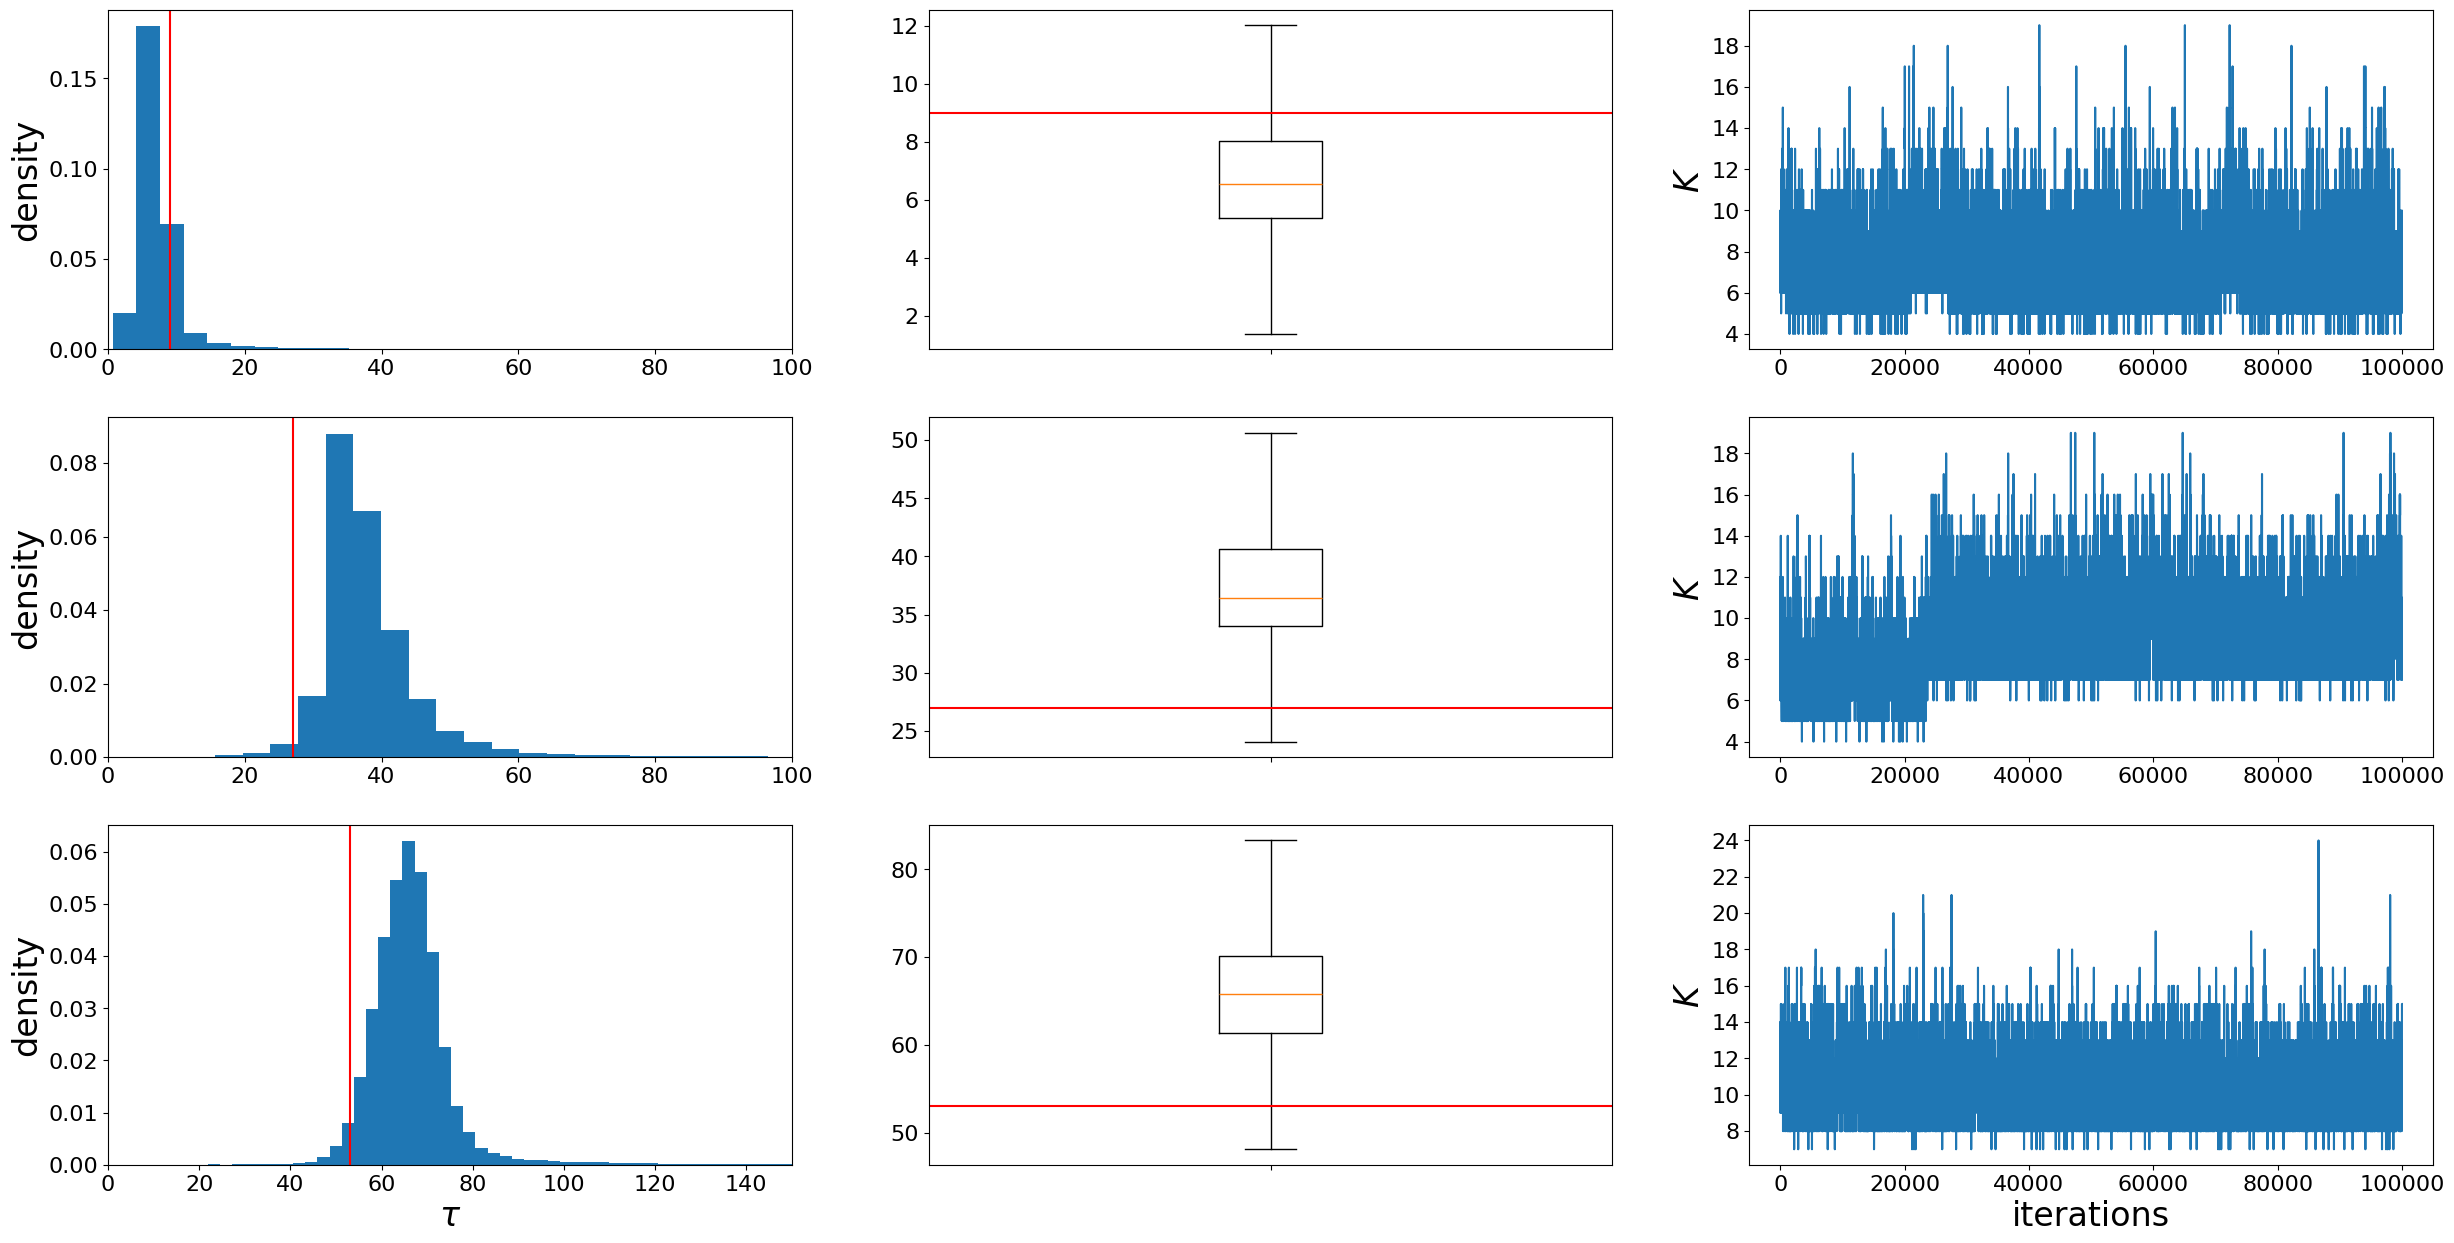

In [12]:
table_list = []

headers = ["Algorithm type", "$n$", r"True $\tau$", r"Est. $\tau$", "Structural zeros"]
table_list.append(headers)

fig, ax = plt.subplots(3, 3, figsize = (30, 15))

path = "data/clean/BNP/mc/"
tau_insample = [9, 27, 53]

n_list = [1000, 5000, 10000]

for i in range(3):

	tau_chain = np.load(path+str(n_list[i])+"/NY_tau_"+str(n_list[i])+"_MCMC_tau.npy")
	K_chain = np.load(path+str(n_list[i])+"/NY_tau_"+str(n_list[i])+"_MCMC_K.npy")

	table_list.append(["BNP Monte Carlo", "n="+str(n_list[i]), r"$\tau$="+str(tau_insample[i]), 
				str(np.round(np.mean(tau_chain),2))+"+/-"+str(np.round(np.std(tau_chain),2)), "False"])

	if i ==0:
		nbins = 50
	else:
		nbins = 100
		
	ax[i,0].hist(tau_chain, nbins, density = True)
	ax[i,0].axvline(x=tau_insample[i], color = "red")
	ax[i,0].set_ylabel(r"density")

	if i ==0:
		vxlim = 100
	elif i==1:
		vxlim = 100
	else:
		vxlim = 150

	ax[i,0].set_xlim((0,vxlim))

	ax[i,1].boxplot(tau_chain, showfliers=False)
	ax[i,1].axhline(y=tau_insample[i], color = "red")
	ax[i,1].set_xticklabels([r""])

	ax[i,2].plot(K_chain)
	ax[i,2].set_ylabel(r"$K$")

	if i ==2:

		ax[i,0].set_xlabel(r"$\tau$")
		ax[i,2].set_xlabel("iterations")

	ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [13]:
table_to_print = tabulate(table_list, tablefmt="fancy_grid")
print(table_to_print)

╒═════════════════╤═════════╤═════════════╤═══════════════╤══════════════════╕
│ Algorithm type  │ $n$     │ True $\tau$ │ Est. $\tau$   │ Structural zeros │
├─────────────────┼─────────┼─────────────┼───────────────┼──────────────────┤
│ BNP Monte Carlo │ n=1000  │ $\tau$=9    │ 7.49+/-5.32   │ False            │
├─────────────────┼─────────┼─────────────┼───────────────┼──────────────────┤
│ BNP Monte Carlo │ n=5000  │ $\tau$=27   │ 38.8+/-12.0   │ False            │
├─────────────────┼─────────┼─────────────┼───────────────┼──────────────────┤
│ BNP Monte Carlo │ n=10000 │ $\tau$=53   │ 66.72+/-10.85 │ False            │
╘═════════════════╧═════════╧═════════════╧═══════════════╧══════════════════╛


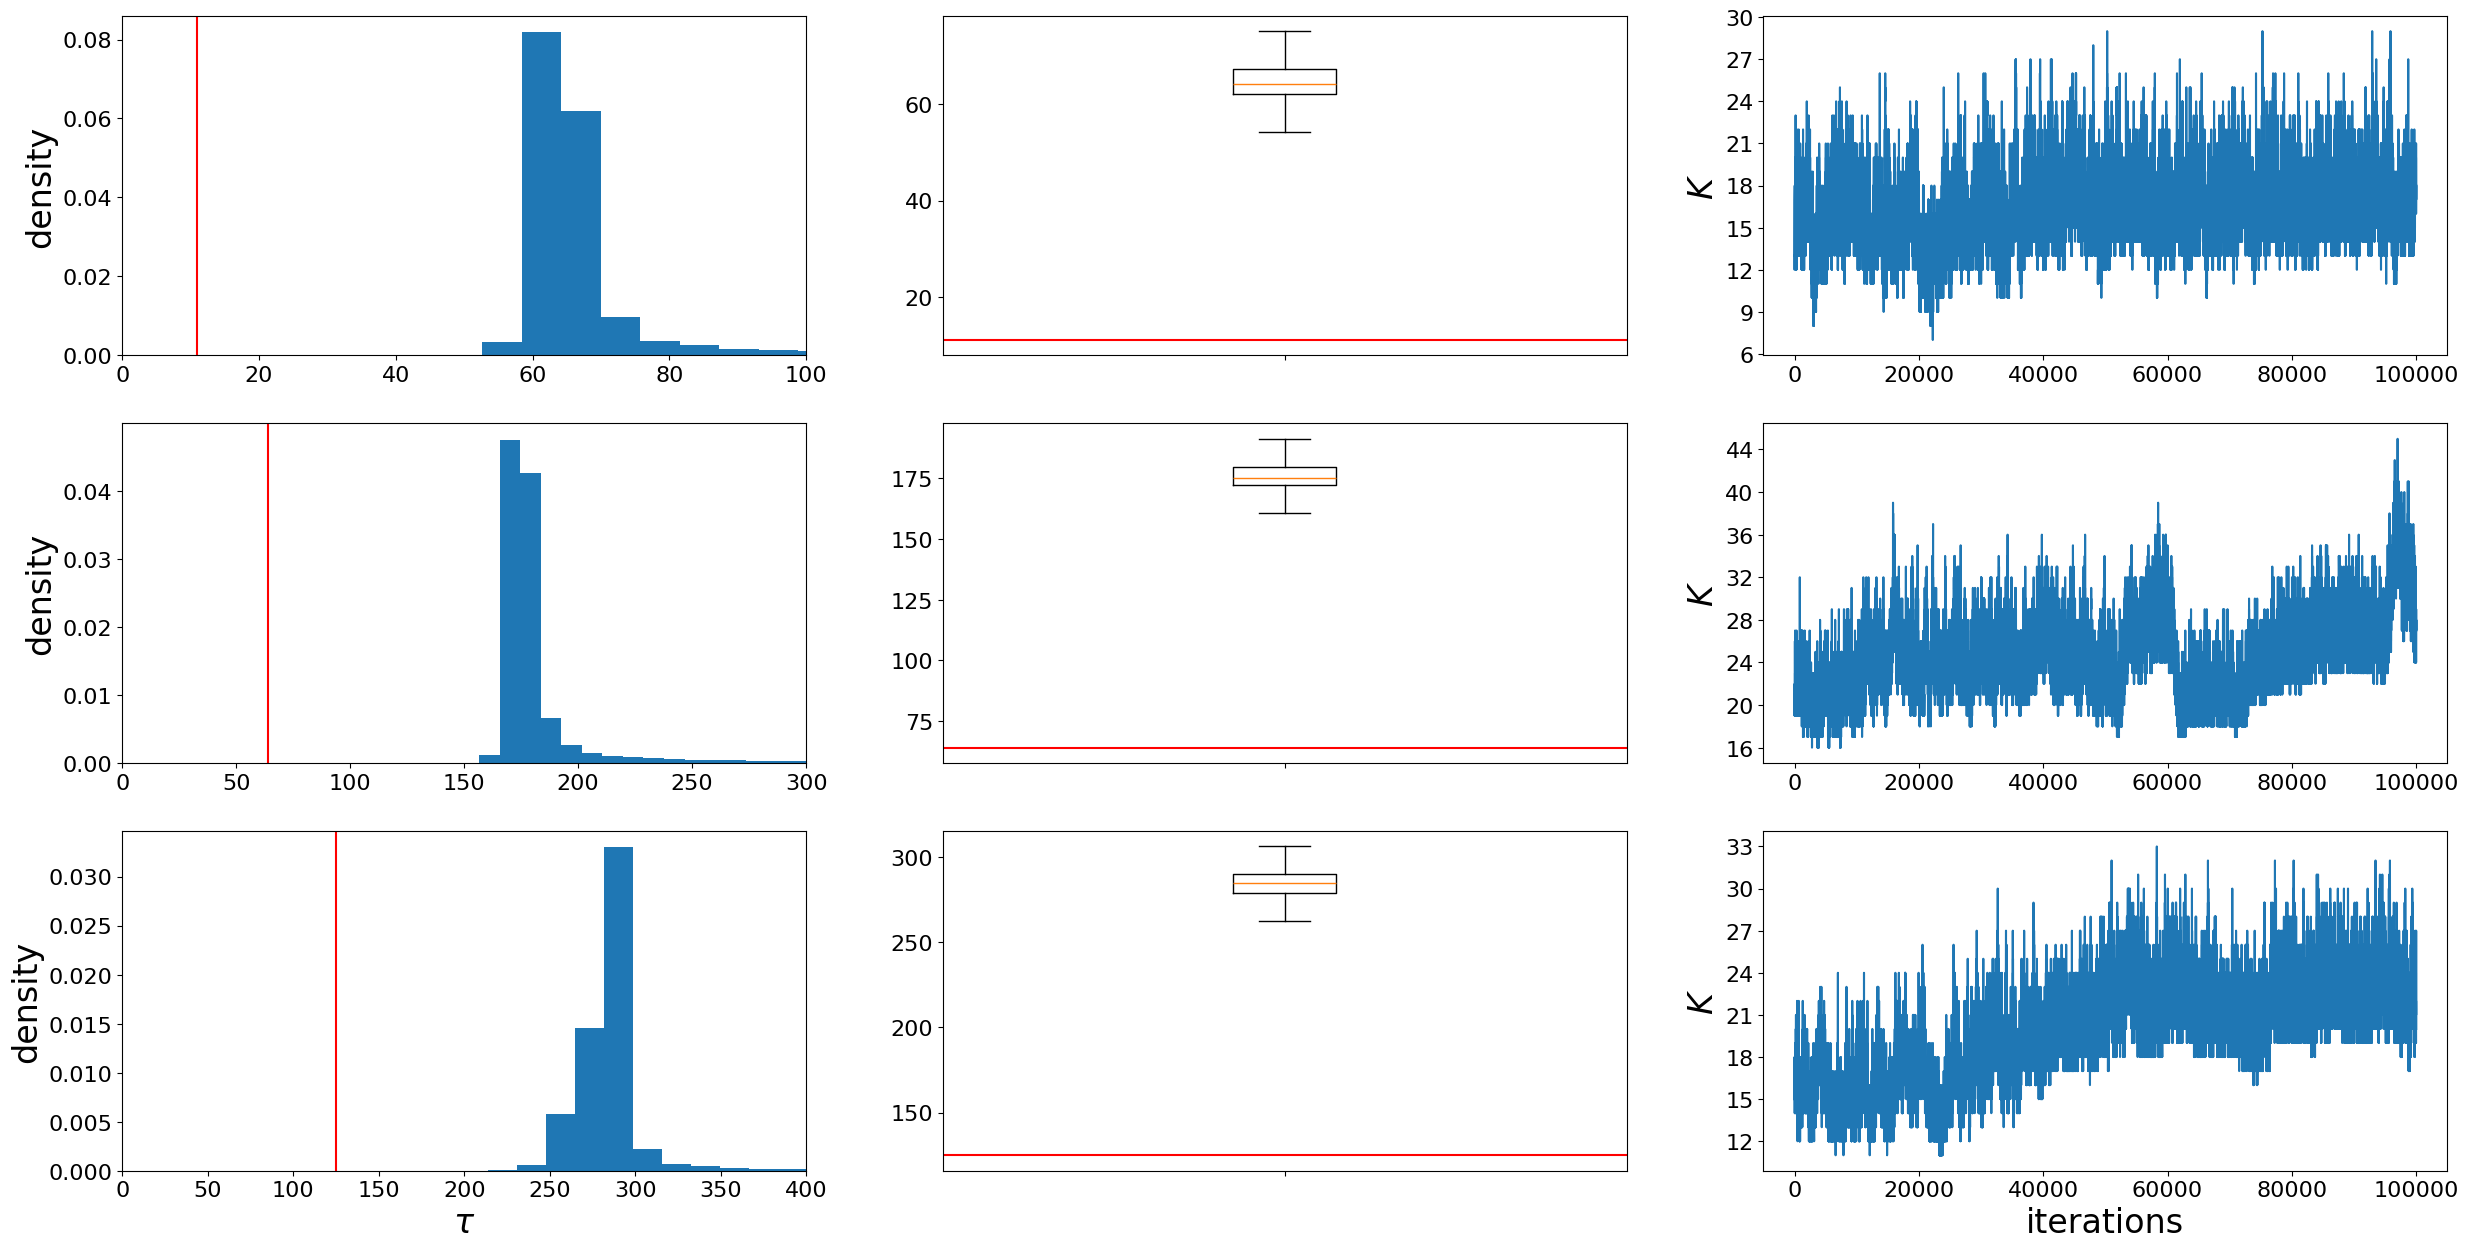

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (30, 15))

path = "data/structural_zeros/BNP/mc/"
tau_insample = [11, 64, 125]

n_list = [1000, 5000, 10000]

for i in range(3):

	tau_chain = np.load(path+str(n_list[i])+"/SZ_NY_tau_"+str(n_list[i])+"_MCMC_tau.npy")
	K_chain = np.load(path+str(n_list[i])+"/SZ_NY_tau_"+str(n_list[i])+"_MCMC_K.npy")

	table_list.append(["BNP Monte Carlo", "n="+str(n_list[i]), r"$\tau$="+str(tau_insample[i]), 
				str(np.round(np.mean(tau_chain),2))+"+/-"+str(np.round(np.std(tau_chain),2)), "True"])

	if i ==0:
		nbins = 50
	elif i ==1:
		nbins = 75
	else:
		nbins = 100
		
	ax[i,0].hist(tau_chain, nbins, density = True)
	ax[i,0].axvline(x=tau_insample[i], color = "red")
	ax[i,0].set_ylabel(r"density")

	if i ==0:
		vxlim = 100
	elif i==1:
		vxlim = 300
	else:
		vxlim = 400

	ax[i,0].set_xlim((0,vxlim))

	ax[i,1].boxplot(tau_chain, showfliers=False)
	ax[i,1].axhline(y=tau_insample[i], color = "red")
	ax[i,1].set_xticklabels([r""])

	ax[i,2].plot(K_chain)
	ax[i,2].set_ylabel(r"$K$")

	if i ==2:

		ax[i,0].set_xlabel(r"$\tau$")
		ax[i,2].set_xlabel("iterations")

	ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [15]:
table_to_print = tabulate(table_list, tablefmt="fancy_grid")
print(table_to_print)

╒═════════════════╤═════════╤═════════════╤════════════════╤══════════════════╕
│ Algorithm type  │ $n$     │ True $\tau$ │ Est. $\tau$    │ Structural zeros │
├─────────────────┼─────────┼─────────────┼────────────────┼──────────────────┤
│ BNP Monte Carlo │ n=1000  │ $\tau$=9    │ 7.49+/-5.32    │ False            │
├─────────────────┼─────────┼─────────────┼────────────────┼──────────────────┤
│ BNP Monte Carlo │ n=5000  │ $\tau$=27   │ 38.8+/-12.0    │ False            │
├─────────────────┼─────────┼─────────────┼────────────────┼──────────────────┤
│ BNP Monte Carlo │ n=10000 │ $\tau$=53   │ 66.72+/-10.85  │ False            │
├─────────────────┼─────────┼─────────────┼────────────────┼──────────────────┤
│ BNP Monte Carlo │ n=1000  │ $\tau$=11   │ 68.64+/-19.11  │ True             │
├─────────────────┼─────────┼─────────────┼────────────────┼──────────────────┤
│ BNP Monte Carlo │ n=5000  │ $\tau$=64   │ 186.06+/-46.67 │ True             │
├─────────────────┼─────────┼───────────

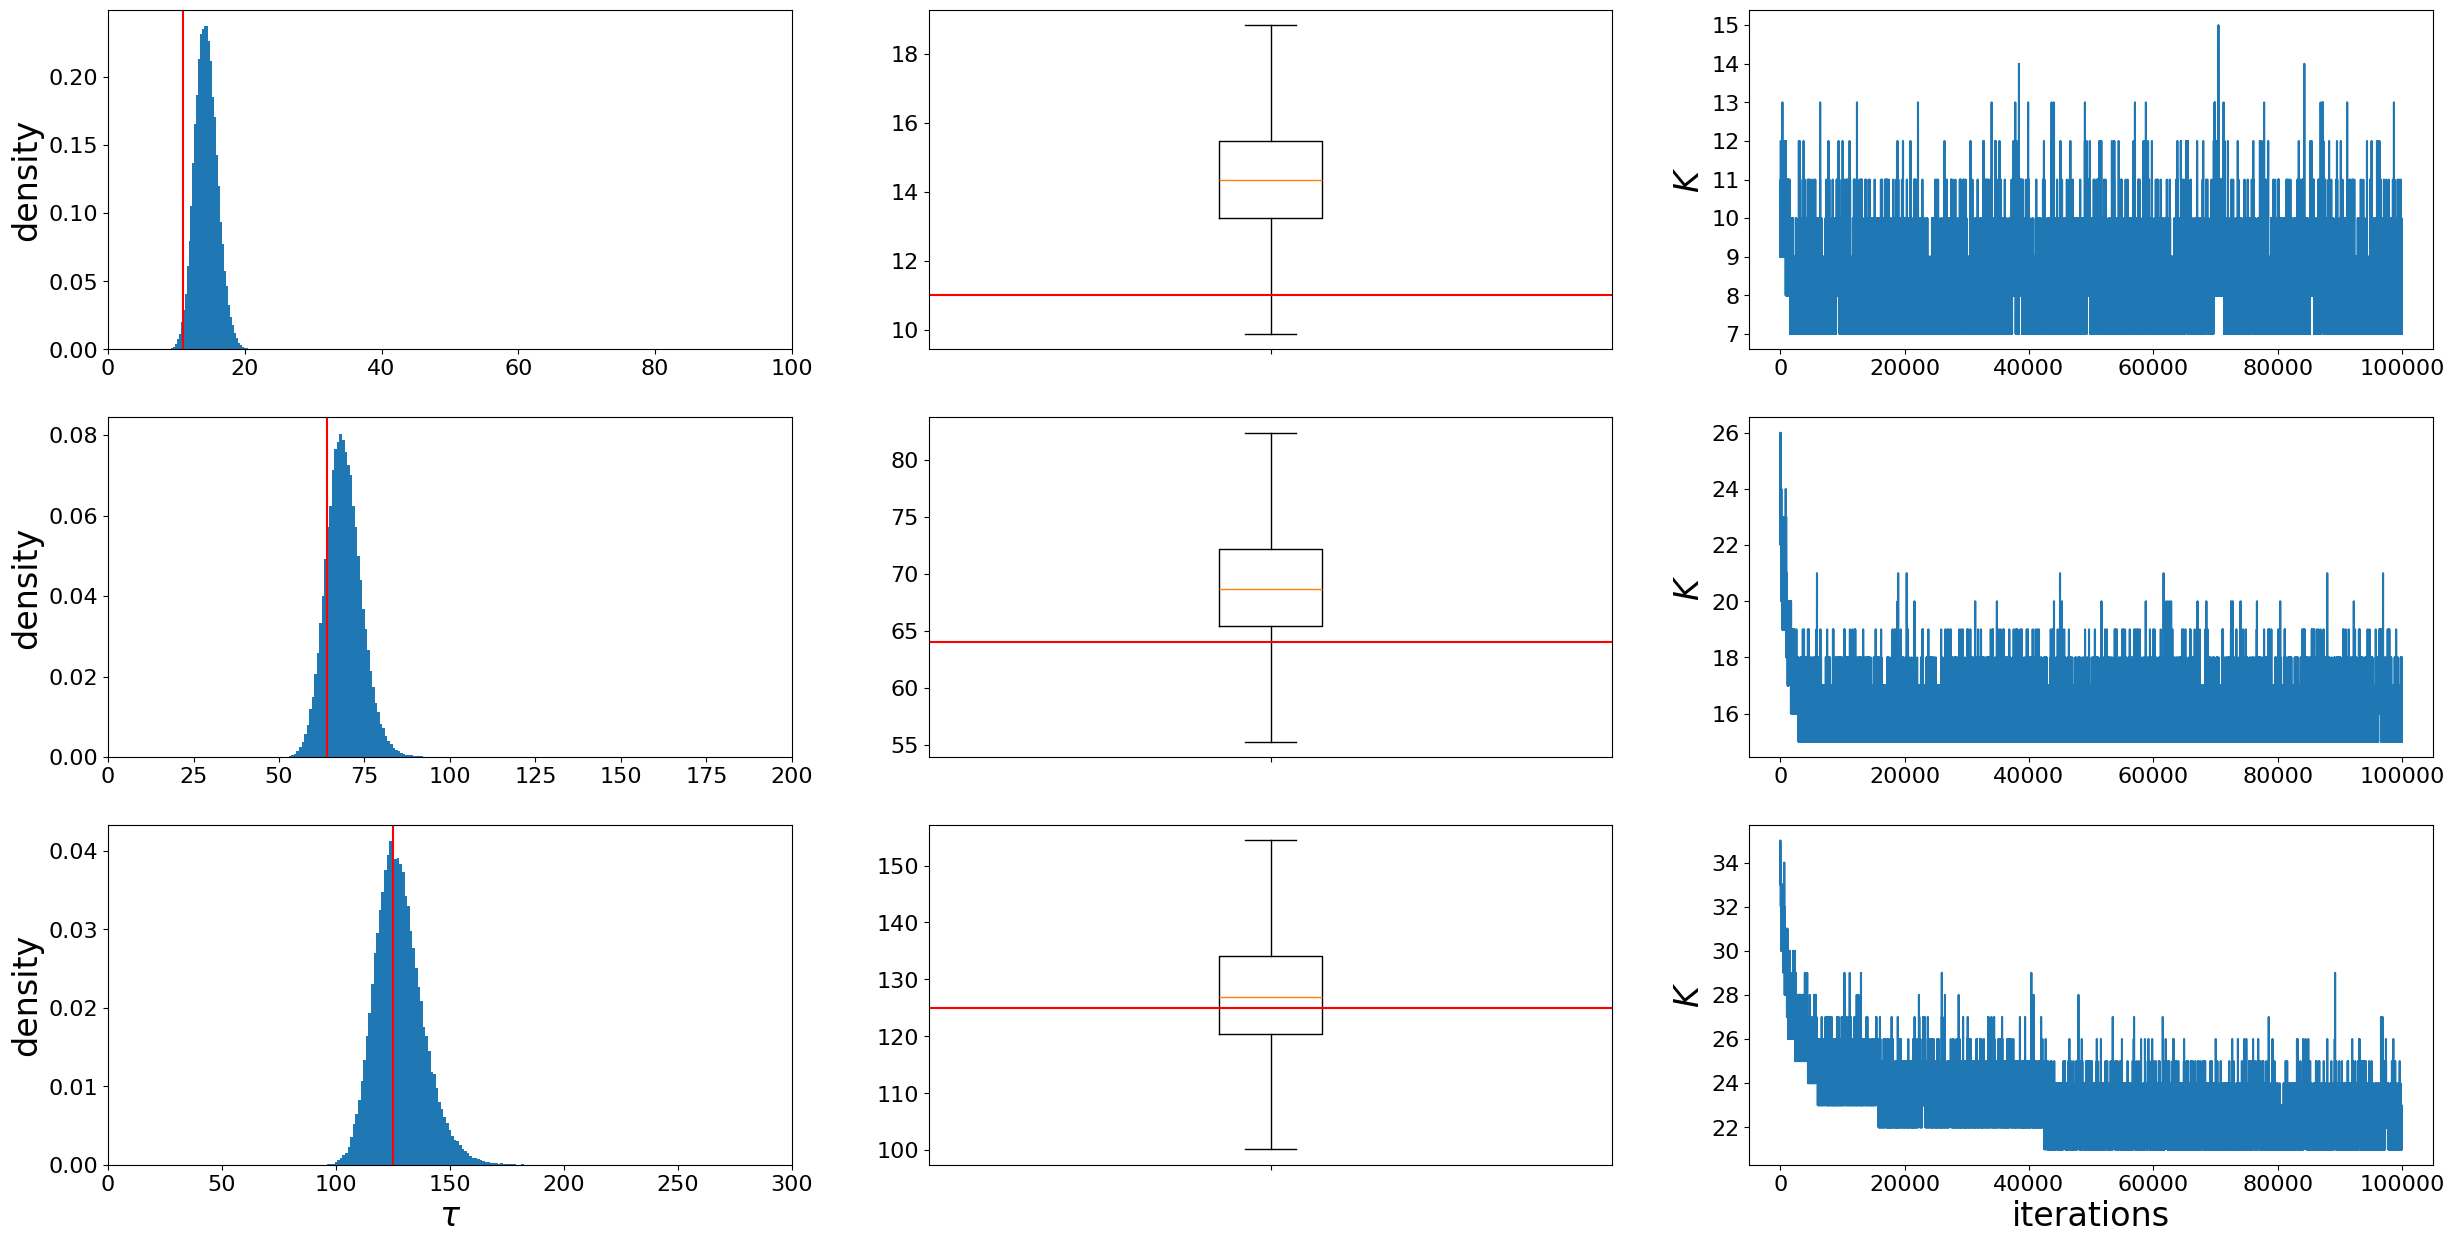

In [16]:
fig, ax = plt.subplots(3, 3, figsize = (30, 15))

path = "data/structural_zeros/SZ_BNP/mc/"
tau_insample = [11, 64, 125]

n_list = [1000, 5000, 10000]

for i in range(3):

	tau_chain = np.load(path+str(n_list[i])+"/SZ_NY_tau_"+str(n_list[i])+"_MCMC_tau.npy")
	K_chain = np.load(path+str(n_list[i])+"/SZ_NY_tau_"+str(n_list[i])+"_MCMC_K.npy")

	table_list.append(["SZ BNP Monte Carlo", "n="+str(n_list[i]), r"$\tau$="+str(tau_insample[i]), 
				str(np.round(np.mean(tau_chain),2))+"+/-"+str(np.round(np.std(tau_chain),2)), "True"])

	if i ==0:
		nbins = 50
	elif i ==1:
		nbins = 75
	else:
		nbins = 100
		
	ax[i,0].hist(tau_chain, nbins, density = True)
	ax[i,0].axvline(x=tau_insample[i], color = "red")
	ax[i,0].set_ylabel(r"density")

	if i ==0:
		vxlim = 100
	elif i==1:
		vxlim = 200
	else:
		vxlim = 300

	ax[i,0].set_xlim((0,vxlim))

	ax[i,1].boxplot(tau_chain, showfliers=False)
	ax[i,1].axhline(y=tau_insample[i], color = "red")
	ax[i,1].set_xticklabels([r""])

	ax[i,2].plot(K_chain)
	ax[i,2].set_ylabel(r"$K$")

	if i ==2:

		ax[i,0].set_xlabel(r"$\tau$")
		ax[i,2].set_xlabel("iterations")

	ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))